### This script is used to generate input files compatible with `CellReg`
#### GT 4/2/2020 v0.0

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import io as sio
import sima

/home/gergely/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/home/gergely/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/home/gergely/anaconda2/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
/home/gergely/anaconda2/lib/python2.7/site-packages/skimage/measure/_marching_cubes_lewiner.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _marching_cubes_lewiner_cy
/home/gergely/anaconda2/lib/python2.7/site-packages/sk

### Step 1. importing imaging data to Matlab

In [15]:
# importing an imaging dataset
dataset = sima.ImagingDataset.load('/data/gergely/invivo_DATA/mossy/gtm4_1/10_23_hr1/TSeries-10232018-rf_A_d0s2-003/TSeries-10232018-rf_A_d0s2-003.sima/')
dataset.ROIs.keys()

['ROIs', 'ROIs_binarized']

In [16]:
# checking roi set
rois = dataset.ROIs['ROIs']
print('number of cells:', len(rois))
print('type of rois:', type(rois))
print('image shape', rois[0].__array__()[1].shape)

('number of cells:', 143)
('type of rois:', <class 'sima.ROI.ROIList'>)
('image shape', (508, 503))


In [17]:
# converting all of the roi-s to a dict and saving them as .mat file 
roiArray = []
for i in range(len(rois)):
    roiDict = rois[i].todict(type='mask')
    roiArray.append((roiDict['mask'][0]).toarray())
roiArray = np.array(roiArray)
print(roiArray.shape)
matFileName = 'roiMask_d0_s2.mat'
sio.savemat(matFileName, {'roiMasks': roiArray})

(143, 508, 503)


This file now can be read by Matlab

In [7]:
# converting a single roi to a dictionary and saving
# it as a .mat file.
roiDict = rois[100].todict(type='mask')
inputDict = {roiDict['id']:(roiDict['mask'][0]).toarray()}
matFileName = roiDict['id']+'_mask.mat'
sio.savemat(matFileName, inputDict)

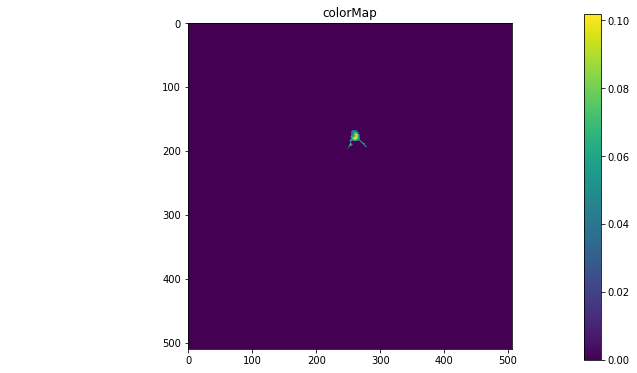

In [10]:
# plotting roi mask in matplotlib

H = (rois[0].mask[0]).toarray()
# H = roiDict['mask'][0].toarray()
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

TODO: add plotting function which plots all of the ROIs

### Step 2. Importing the result `.mat` files to Python